In [3]:
#import neccessaries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

(150, 4)


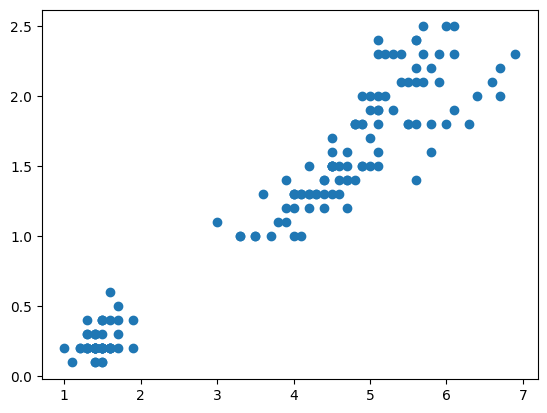

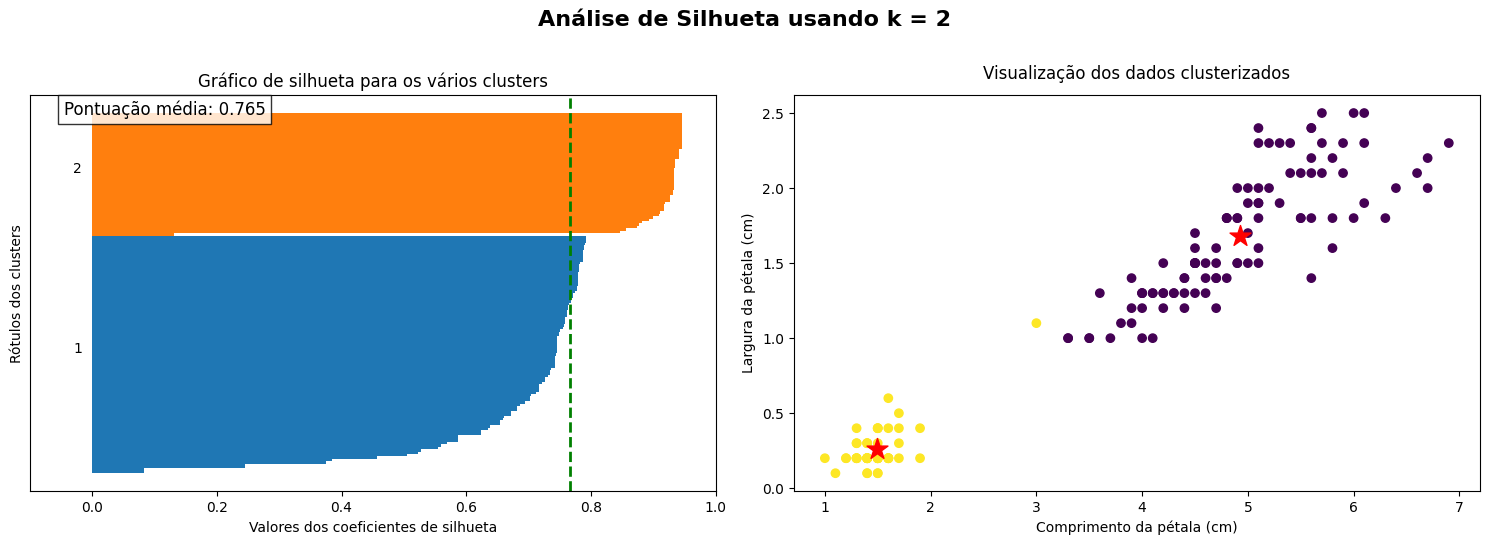

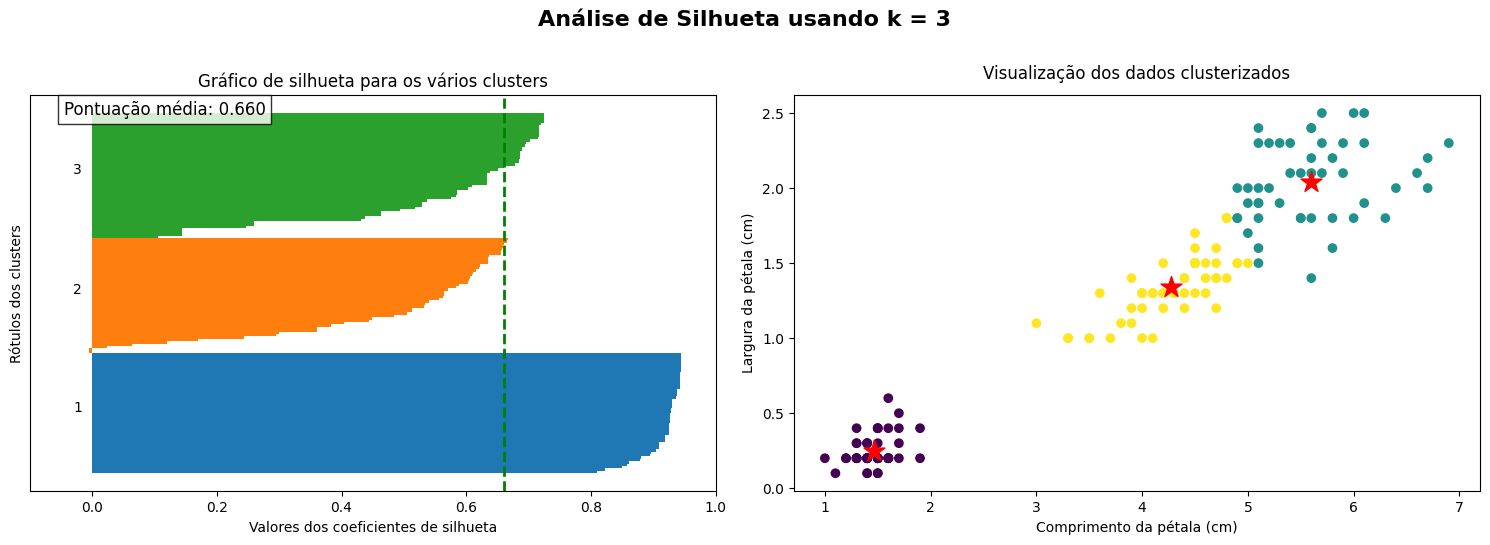

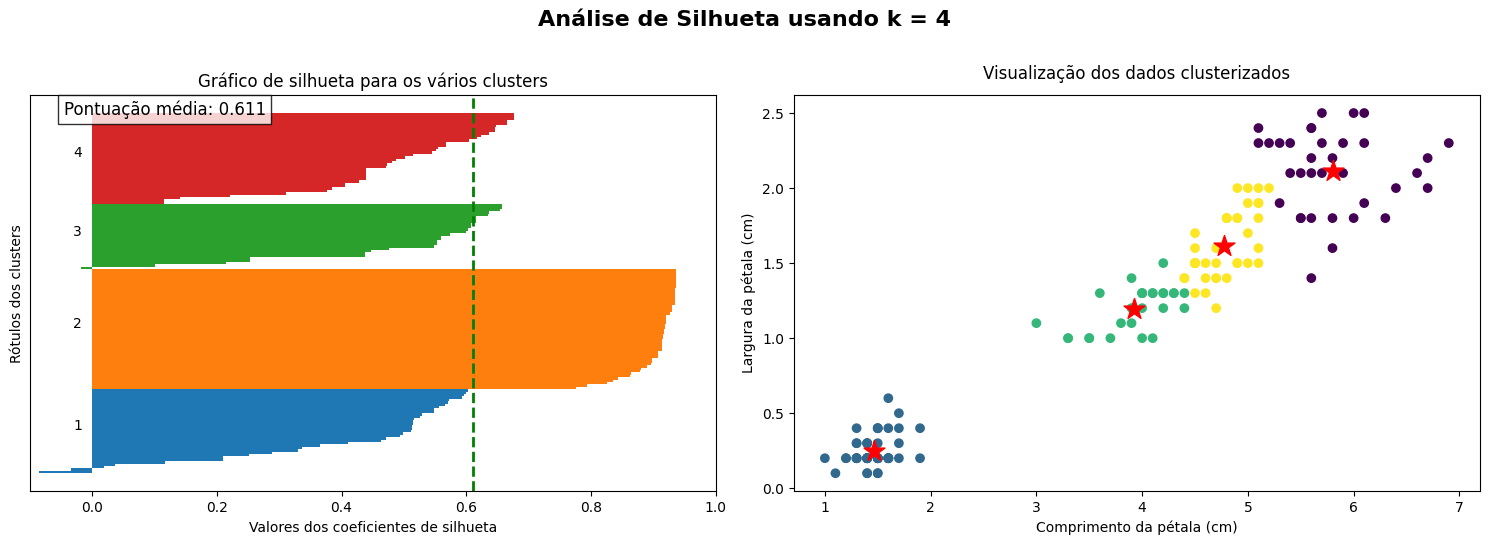

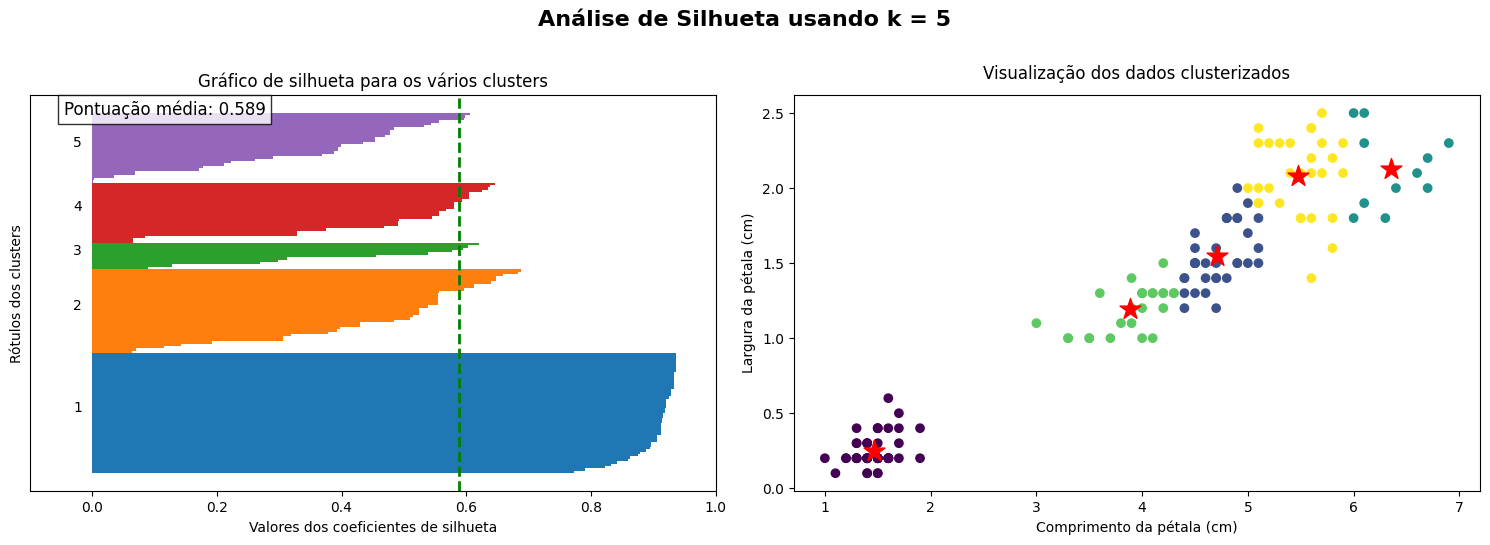

In [13]:
# load petal data
data = datasets.load_iris()
dir(data)
# load into Dataframe 
df = pd.DataFrame(data.data,columns = data.feature_names)
print(df.shape)
df.head()
df1 = df.drop(['sepal length (cm)', 'sepal width (cm)'],axis = 'columns')
df1.head()
# plot scatter plot
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])
# Now check silhouette coefficient
for i, k in enumerate([2, 3, 4, 5]):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Run the kmeans algorithm
    km = KMeans(n_clusters=k)
    y_predict = km.fit_predict(df1)
    centroids = km.cluster_centers_

    # get silhouette
    silhouette_vals = silhouette_samples(df1, y_predict)

    # silhouette plot
    y_ticks = []
    y_lower = y_upper = 0
    for j, cluster in enumerate(np.unique(y_predict)):
        cluster_silhouette_vals = silhouette_vals[y_predict == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)

        ax[0].barh(range(y_lower, y_upper),
                   cluster_silhouette_vals, height=1)
        ax[0].text(-0.03, (y_lower + y_upper) / 2, str(j + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score
    avg_score = np.mean(silhouette_vals)
    ax[0].axvline(avg_score, linestyle='--',
                  linewidth=2, color='green')
    ax[0].text(0.05, 0.95, f'Pontuação média: {avg_score:.3f}',
               transform=ax[0].transAxes, fontsize=12,
               bbox=dict(facecolor='white', alpha=0.8))
    ax[0].set_yticks([])
    ax[0].set_xlim([-0.1, 1])
    ax[0].set_xlabel('Valores dos coeficientes de silhueta')
    ax[0].set_ylabel('Rótulos dos clusters')
    ax[0].set_title('Gráfico de silhueta para os vários clusters')

    # scatter plot of data colored with labels
    ax[1].scatter(df1['petal length (cm)'],
                  df1['petal width (cm)'], c=y_predict)
    ax[1].scatter(centroids[:, 0], centroids[:, 1],
                  marker='*', c='r', s=250)
    ax[1].set_xlabel('Comprimento da pétala (cm)')
    ax[1].set_ylabel('Largura da pétala (cm)')
    ax[1].set_title('Visualização dos dados clusterizados', y=1.02)

    plt.tight_layout()
    plt.suptitle(f'Análise de Silhueta usando k = {k}', fontsize=16, fontweight='semibold', y=1.08)
    plt.savefig(f'Silhouette_analysis_{k}.jpg')